In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [13]:
path_1 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df = pd.read_csv(path_1.joinpath('2000-2002.csv'), index_col='date', parse_dates=True)

### This time I am using an approach to avoid data leakage. Im trying to split the train and test set first and afterwards build the model and do all the data preparation stuff

In [15]:
# drop the fips column, because in this df all the entries are the same
df.drop(['fips'], axis=1, inplace=True)

In [17]:
# interpolate the data
df.interpolate(method='time', inplace=True)
df.dropna(how='any', inplace=True)

In [18]:
df['target'] = df.score.shift(-1)
df.dropna(inplace=True)

In [23]:
df.tail()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,target
date,,,,,,,,,,,,,,,,,,,,
2002-12-26,0.0,101.19,3.17,0.65,-2.33,-2.30,7.40,-2.88,10.28,0.47,1.61,2.16,1.16,1.00,3.07,4.76,1.85,2.91,0.0,0.0
2002-12-27,0.0,101.24,3.15,1.81,-2.40,-2.37,9.50,-4.41,13.91,0.70,1.71,2.40,0.52,1.88,2.96,4.22,0.65,3.58,0.0,0.0
2002-12-28,0.0,101.16,4.37,4.08,1.83,1.84,13.11,-2.46,15.58,3.60,2.09,2.65,0.71,1.94,4.21,5.77,1.08,4.68,0.0,0.0
2002-12-29,0.0,100.93,5.41,7.06,4.96,4.96,15.25,1.11,14.14,6.93,1.64,2.56,0.60,1.95,3.45,6.12,0.87,5.25,0.0,0.0
2002-12-30,1.4,100.57,7.02,9.76,8.57,8.57,14.41,4.48,9.94,9.73,2.27,3.10,1.49,1.62,4.59,6.14,2.83,3.31,0.0,0.0


In [25]:
X_train = df.drop(['target'], axis = 1).iloc[0:764]
X_test = df.drop(['target'], axis = 1).iloc[764:]
y_train = df.target.iloc[0:764]
y_test = df.target.iloc[764:]

In [29]:
X_test_half = df.drop(['target'], axis = 1).iloc[764:928]
y_test_half = df.target.iloc[764:928]
validation_X = df.drop(['target'], axis = 1).iloc[928:]
validation_y = df.target.iloc[928:]

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
prediction_test = model.predict(X_test_half)

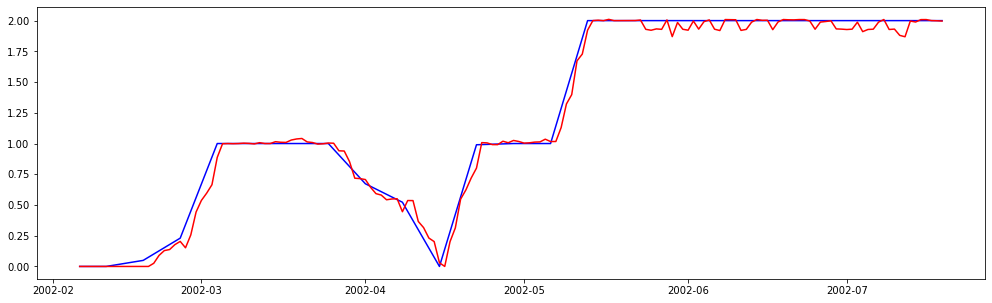

In [67]:
plt.figure(figsize=(17,5))
plt.plot(df.index[764:928], y_test_half, color='blue')
plt.plot(df.index[764:928], prediction_test, color='red')

In [35]:
predictions_validation = model.predict(validation_X)

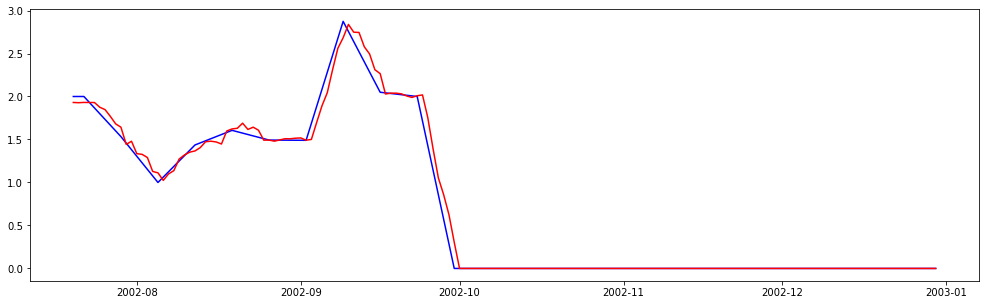

In [36]:
plt.figure(figsize=(17,5))
plt.plot(df.index[928:], validation_y, color='blue')
plt.plot(df.index[928:], predictions_validation, color='red')

In [37]:
from sklearn.metrics import accuracy_score

In [39]:
model.score(X_test_half, y_test_half)

0.9919999427604093

In [40]:
model.score(validation_X, validation_y)

0.990495837507828

# Import another validation dataframe

In [54]:
path_2 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df_validation = pd.read_csv(path_1.joinpath('rf_validation.csv'), index_col='date', parse_dates=True)

In [55]:
# Drop the fips column
df_validation.drop(['fips'], axis=1, inplace=True)

In [60]:
df_validation.shape

(55, 20)

In [57]:
# Interpolate the data
df_validation.interpolate(method='time', inplace=True)
df_validation.dropna(how='any', inplace=True)

In [59]:
# Transform problem into supervised learning problem
df_validation['target'] = df_validation.score.shift(-1)
df_validation.dropna(inplace=True)

In [61]:
validation_X_2 = df_validation.drop(['target'], axis = 1)
validation_y_2 = df_validation.target

In [62]:
validation_X_2.shape

(55, 19)

In [64]:
prediction_validation_2 = model.predict(validation_X_2)

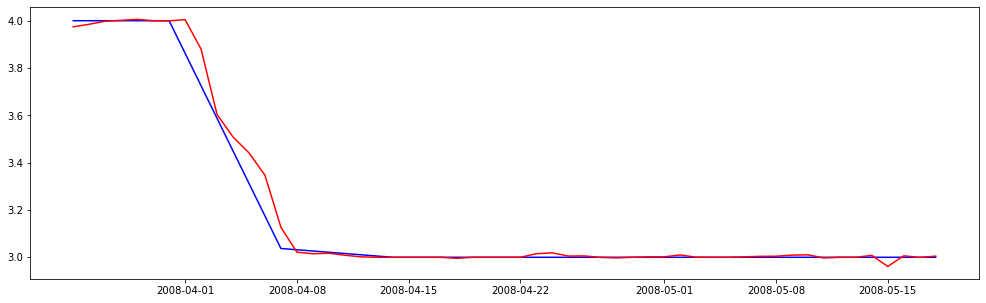

In [68]:
plt.figure(figsize=(17,5))
plt.plot(df_validation.index, validation_y_2, color='blue')
plt.plot(df_validation.index, prediction_validation_2, color='red')

In [70]:
model.score(validation_X_2, validation_y_2)

0.9849019879869206